In [1]:
from sklearn.datasets import load_boston

%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

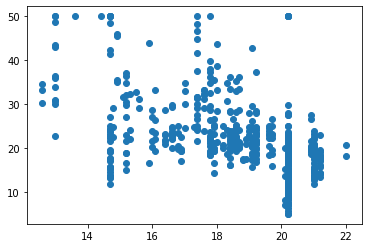

In [5]:
# pupil-teacher ratio by town
pupil_teacher = boston_nieruchomosci['data'][:, np.newaxis, 10]
plt.scatter(pupil_teacher, boston_nieruchomosci['target'])
plt.show()

Metryka domyślna:  0.29567123066345813
Metryka r2:  0.29567123066345813
Współczynniki regresji:
 [-2.08270614]


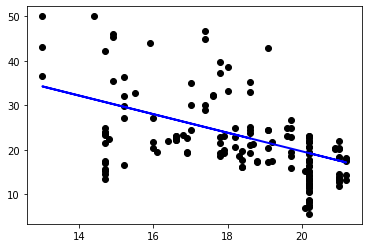

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(pupil_teacher, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ilości "pupili" w mieście
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

cv_score_r2 = cross_val_score(linreg, pupil_teacher, boston_nieruchomosci.target, cv=5, scoring='r2')
print(cv_score_r2)

cv_score_ev = cross_val_score(linreg, pupil_teacher, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

cv_score_mse = cross_val_score(linreg, pupil_teacher, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

[-0.02804646 -0.02451286 -0.16183982  0.03434793 -0.61793137]
[-0.01617988  0.0093369   0.18836605  0.03664255  0.00821014]
[-35.50378502 -93.26832479 -93.04850147 -84.69913115 -43.01807194]


In [16]:
# To samo co powyżej dla danych o cykrzycy
from sklearn.datasets import load_diabetes
cukrzyca = load_diabetes()
print(cukrzyca['DESCR'])

# konwersja na obiekt pandas.DataFrame
cukrzyca_df = pd.DataFrame(boston_nieruchomosci['data'], columns=cukrzyca['feature_names'])

cukrzyca_df['target'] = np.array(list(cukrzyca['target']))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

ValueError: Shape of passed values is (506, 13), indices imply (506, 10)

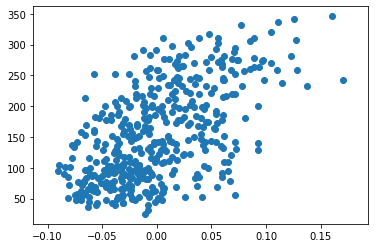

In [15]:

# Body mass index
body_mass = cukrzyca['data'][:, np.newaxis, 2]
plt.scatter(body_mass, cukrzyca['target'])
plt.show()

Metryka domyślna:  0.2218535192046571
Metryka r2:  0.22185351920465712
Współczynniki regresji:
 [979.93420828]


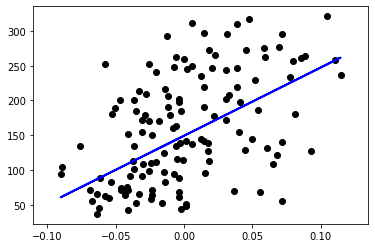

In [17]:
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(body_mass, cukrzyca['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie masy ciała u cukrzyków, czy raczej korelacja między występowaniem cukrzycy a masą ciała
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [18]:
#walidacja krzyżowa 
cv_score_r2 = cross_val_score(linreg, body_mass, cukrzyca.target, cv=5, scoring='r2')
print(cv_score_r2)

cv_score_ev = cross_val_score(linreg, body_mass, cukrzyca.target, cv=5, scoring='explained_variance')
print(cv_score_ev)

cv_score_mse = cross_val_score(linreg, body_mass, cukrzyca.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)

[0.20669771 0.37001525 0.38937267 0.29361018 0.36254055]
[0.22483329 0.37177536 0.38941179 0.29933925 0.36255078]
[-3865.97147707 -3996.89622667 -3821.66280573 -3705.91035198
 -4124.81539514]
